In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
csv_file_path = "../data/instagram_data.csv"
df = pd.read_csv(csv_file_path)

In [5]:
df.head()

,likes,no_of_comments,t,follower_count_at_t,image_path
0,154552,0,1594174009,40934474,../Data/insta_data/0.jpg
1,97386,0,1593571666,40934474,../Data/insta_data/2.jpg
2,145632,0,1593136341,40934474,../Data/insta_data/4.jpg
3,76461,0,1592981047,40934474,../Data/insta_data/6.jpg
4,174620,0,1592703461,40934474,../Data/insta_data/8.jpg


In [6]:
print(df.describe())

              likes  no_of_comments             t  follower_count_at_t
count  3.785000e+03     3785.000000  3.785000e+03         3.785000e+03
mean   1.832536e+05     2531.382827  1.585137e+09         1.409485e+07
std    1.936969e+05    21064.081137  1.322603e+07         9.402605e+06
min    1.431000e+03        0.000000  1.489547e+09         1.870000e+02
25%    5.208700e+04      194.000000  1.582540e+09         7.296298e+06
50%    1.236640e+05      484.000000  1.588855e+09         1.104970e+07
75%    2.431440e+05     1337.000000  1.592738e+09         1.836292e+07
max    2.161369e+06   733973.000000  1.594541e+09         4.093447e+07


In [8]:
# converting unix time to date-time format
df['datetime'] = pd.to_datetime(df['t'], unit='s')

# Extract features like day, hour, etc.
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour_of_day'] = df['datetime'].dt.hour

print(df[['datetime', 'day_of_week', 'hour_of_day']])

                datetime day_of_week  hour_of_day
0    2020-07-08 02:06:49   Wednesday            2
1    2020-07-01 02:47:46   Wednesday            2
2    2020-06-26 01:52:21      Friday            1
3    2020-06-24 06:44:07   Wednesday            6
4    2020-06-21 01:37:41      Sunday            1
...                  ...         ...          ...
3780 2019-04-13 14:11:14    Saturday           14
3781 2019-04-08 06:51:22      Monday            6
3782 2019-03-30 11:39:56    Saturday           11
3783 2019-03-15 10:18:08      Friday           10
3784 2019-03-07 05:46:48    Thursday            5

[3785 rows x 3 columns]


In [9]:
print(df.describe())

              likes  no_of_comments             t  follower_count_at_t  \
count  3.785000e+03     3785.000000  3.785000e+03         3.785000e+03   
mean   1.832536e+05     2531.382827  1.585137e+09         1.409485e+07   
min    1.431000e+03        0.000000  1.489547e+09         1.870000e+02   
25%    5.208700e+04      194.000000  1.582540e+09         7.296298e+06   
50%    1.236640e+05      484.000000  1.588855e+09         1.104970e+07   
75%    2.431440e+05     1337.000000  1.592738e+09         1.836292e+07   
max    2.161369e+06   733973.000000  1.594541e+09         4.093447e+07   
std    1.936969e+05    21064.081137  1.322603e+07         9.402605e+06   

                            datetime  hour_of_day  
count                           3785  3785.000000  
mean   2020-03-25 11:55:38.107265536     8.828005  
min              2017-03-15 03:00:08     0.000000  
25%              2020-02-24 10:30:23     5.000000  
50%              2020-05-07 12:34:28     9.000000  
75%              2020

In [10]:
#drop the unix time column

In [11]:
df = df.drop('t', axis=1)

In [12]:
df.head()

,likes,no_of_comments,follower_count_at_t,image_path,datetime,day_of_week,hour_of_day
0,154552,0,40934474,../Data/insta_data/0.jpg,2020-07-08 02:06:49,Wednesday,2
1,97386,0,40934474,../Data/insta_data/2.jpg,2020-07-01 02:47:46,Wednesday,2
2,145632,0,40934474,../Data/insta_data/4.jpg,2020-06-26 01:52:21,Friday,1
3,76461,0,40934474,../Data/insta_data/6.jpg,2020-06-24 06:44:07,Wednesday,6
4,174620,0,40934474,../Data/insta_data/8.jpg,2020-06-21 01:37:41,Sunday,1


In [13]:
# Check for missing values
missing_values = df.isna().sum()

# Print missing values
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
likes                  0
no_of_comments         0
follower_count_at_t    0
image_path             0
datetime               0
day_of_week            0
hour_of_day            0
dtype: int64


In [14]:
#It has been found that there are no missing values. We can check for outliers if any

In [15]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        outliers[column] = df[outlier_condition]
    
    return outliers

In [17]:
#The columns that we want to check for outliers

In [18]:
columns_to_check = ['likes', 'no_of_comments', 'follower_count_at_t']

In [23]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outliers_df
    return outliers

# Example usage
outliers = detect_outliers_iqr(df, columns_to_check)

# Print outliers for each column separately
for col, outlier_df in outliers.items():
    print(f"\nOutliers in {col}:")
    if not outlier_df.empty:
        print(outlier_df)
    else:
        print(f"No outliers detected in {col}.")


Outliers in likes:
        likes  no_of_comments  follower_count_at_t  \
134    552727            6086             40220549   
135    546724            3541             40220549   
136   1001243            4715             40220549   
149    622837            4395             40220549   
151    570423            4675             40220549   
...       ...             ...                  ...   
3328   906701           10869              7098245   
3331   539046            1628              7098245   
3599   555781            8334              4825675   
3761   616456           11853              4229627   
3767   563155           13647              4229627   

                       image_path            datetime day_of_week  hour_of_day  
134    ../Data/insta_data/411.jpg 2020-07-03 06:11:42      Friday            6  
135    ../Data/insta_data/412.jpg 2020-07-02 04:58:09    Thursday            4  
136    ../Data/insta_data/413.jpg 2020-06-29 04:24:02      Monday            4  
149    

In [27]:
def detect_and_remove_extreme_outliers(df, columns, multiplier=4):
    # Detect extreme outliers using IQR method
    extreme_outliers = {}
    indices_to_remove = set()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        extreme_outliers_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Store the indices of outliers for this column
        indices_to_remove.update(extreme_outliers_df.index)
        extreme_outliers[col] = extreme_outliers_df

    # Remove the outliers from the DataFrame
    cleaned_df = df.drop(index=indices_to_remove)
    
    return extreme_outliers, cleaned_df

# Example usage with higher multiplier
outliers, cleaned_df = detect_and_remove_extreme_outliers(df, columns_to_check, multiplier=4)

# Print the extreme outliers
for col, outlier_df in outliers.items():
    print(f"\nExtreme Outliers in {col}:")
    if not outlier_df.empty:
        print(outlier_df)
    else:
        print(f"No extreme outliers detected in {col}.")

# Show the cleaned DataFrame after removing the extreme outliers
print("\nCleaned DataFrame after removing extreme outliers:")
print(cleaned_df)



Extreme Outliers in likes:
        likes  no_of_comments  follower_count_at_t  \
591   2161369           37106             21737604   
592   1122787            2685             21737604   
593   2127367           17250             21737604   
594   1305616           13219             21737604   
595   1544210           34196             21737604   
857   1025364           13945             24744858   
859   1064782            9818             24744858   
873   1211850           27522             24744858   
878   1347694           21213             24744858   
1245  1127774           15463             13781991   
1254  1151090           16653             13781991   
1256  1428182           17651             13781991   
1259  1007986           13825             13781991   
1269  1023273           19832             13781991   
1273  1046126           20906             13781991   
1276  1028026           10601             13781991   
1290  1197266           32274             13781991   


BOX PLOT BEFORE OUTLIER REMOVAL


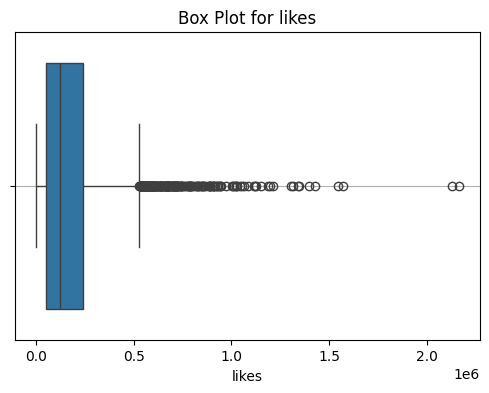

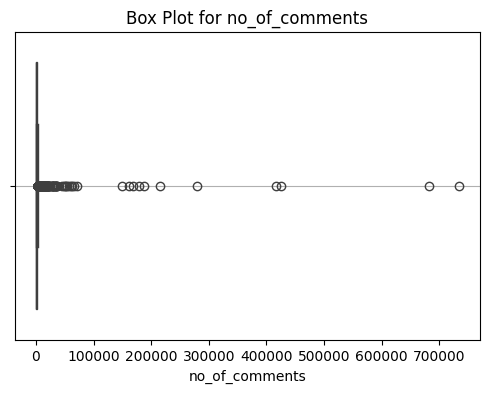

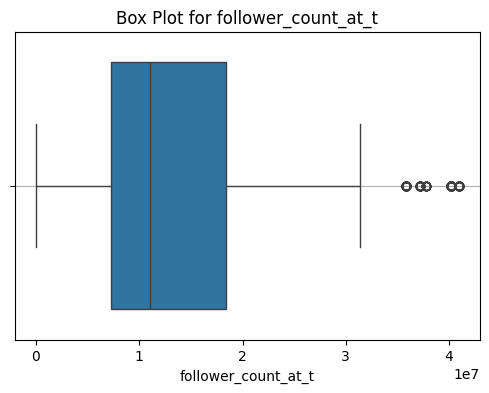

In [29]:
print("BOX PLOT BEFORE OUTLIER REMOVAL")

for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.grid(axis='y')  # Optional: add a grid for better visibility
    plt.show()

BOX PLOT AFTER OUTLIER REMOVAL


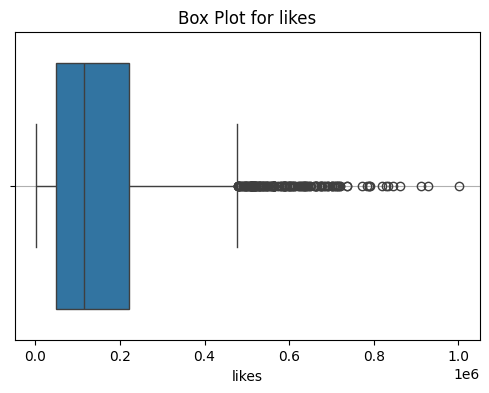

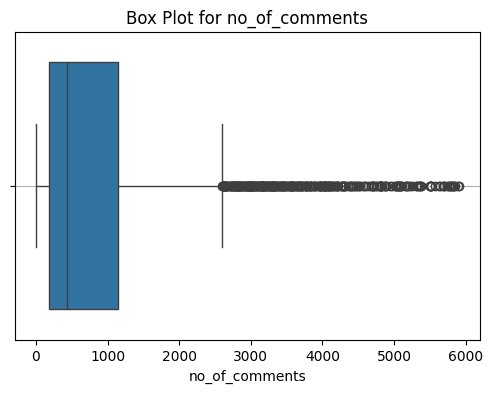

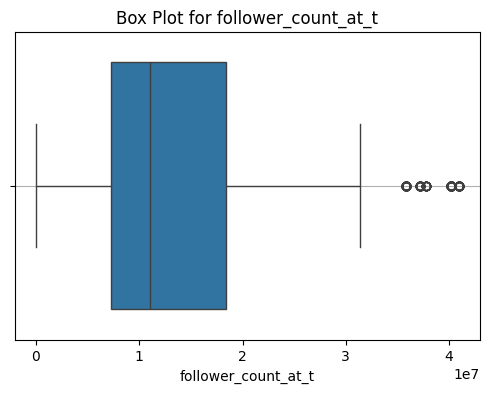

In [30]:
print("BOX PLOT AFTER OUTLIER REMOVAL")
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cleaned_df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.grid(axis='y')  # Optional: add a grid for better visibility
    plt.show()

In [32]:
import numpy as np
#GOING TO IMPLEMENT CYCLIC ENCODING FOR DAY_OF_WEEK
# Map each day of the week to a number (Monday = 0, Sunday = 6)
day_to_num = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
cleaned_df['day_of_week_num'] = cleaned_df['day_of_week'].map(day_to_num)

# Perform cyclical encoding using sine and cosine transformations
cleaned_df['day_of_week_sin'] = np.sin(2 * np.pi * cleaned_df['day_of_week_num'] / 7)
cleaned_df['day_of_week_cos'] = np.cos(2 * np.pi * cleaned_df['day_of_week_num'] / 7)

In [34]:
cleaned_df = cleaned_df.drop('day_of_week', axis=1)

In [36]:
cleaned_df = cleaned_df.drop('day_of_week_num', axis=1)

In [37]:
cleaned_df.head()

,likes,no_of_comments,follower_count_at_t,image_path,datetime,hour_of_day,day_of_week_sin,day_of_week_cos
0,154552,0,40934474,../Data/insta_data/0.jpg,2020-07-08 02:06:49,2,0.974928,-0.222521
1,97386,0,40934474,../Data/insta_data/2.jpg,2020-07-01 02:47:46,2,0.974928,-0.222521
2,145632,0,40934474,../Data/insta_data/4.jpg,2020-06-26 01:52:21,1,-0.433884,-0.900969
3,76461,0,40934474,../Data/insta_data/6.jpg,2020-06-24 06:44:07,6,0.974928,-0.222521
4,174620,0,40934474,../Data/insta_data/8.jpg,2020-06-21 01:37:41,1,-0.781831,0.623490


In [39]:
cleaned_df['year'] = cleaned_df['datetime'].dt.year
cleaned_df['month'] = cleaned_df['datetime'].dt.month
cleaned_df['day'] = cleaned_df['datetime'].dt.day
cleaned_df = cleaned_df.drop('datetime', axis=1)

In [40]:
cleaned_df.head()

,likes,no_of_comments,follower_count_at_t,image_path,hour_of_day,day_of_week_sin,day_of_week_cos,year,month,day
0,154552,0,40934474,../Data/insta_data/0.jpg,2,0.974928,-0.222521,2020,7,8
1,97386,0,40934474,../Data/insta_data/2.jpg,2,0.974928,-0.222521,2020,7,1
2,145632,0,40934474,../Data/insta_data/4.jpg,1,-0.433884,-0.900969,2020,6,26
3,76461,0,40934474,../Data/insta_data/6.jpg,6,0.974928,-0.222521,2020,6,24
4,174620,0,40934474,../Data/insta_data/8.jpg,1,-0.781831,0.623490,2020,6,21


In [41]:
#NEED TO ENCODE YEAR
unique_years = cleaned_df['year'].unique()
print(unique_years)


[2020 2019 2018 2017]


In [42]:
year_mapping = {2017: 1, 2018: 2, 2019: 3, 2020: 4}
cleaned_df['year'] = cleaned_df['year'].map(year_mapping)

In [44]:
cleaned_df.head()

,likes,no_of_comments,follower_count_at_t,image_path,hour_of_day,day_of_week_sin,day_of_week_cos,year,month,day
0,154552,0,40934474,../Data/insta_data/0.jpg,2,0.974928,-0.222521,4,7,8
1,97386,0,40934474,../Data/insta_data/2.jpg,2,0.974928,-0.222521,4,7,1
2,145632,0,40934474,../Data/insta_data/4.jpg,1,-0.433884,-0.900969,4,6,26
3,76461,0,40934474,../Data/insta_data/6.jpg,6,0.974928,-0.222521,4,6,24
4,174620,0,40934474,../Data/insta_data/8.jpg,1,-0.781831,0.623490,4,6,21


In [45]:
#storing this cleaned df to a csv file
cleaned_df.to_csv('../data/cleaned_data.csv', index=False)

print("Cleaned DataFrame saved to 'cleaned_data.csv'")

Cleaned DataFrame saved to 'cleaned_data.csv'
